In [8]:
%matplotlib notebook

import numpy as np
import png

import matplotlib.pyplot as plt
import matplotlib as mpl

In [9]:
reader = png.Reader(filename='gel_lane.png')
width, height, pixels, metadata = reader.read()

array_lane = np.vstack([np.uint8(row) for row in pixels])

<IPython.core.display.Javascript object>


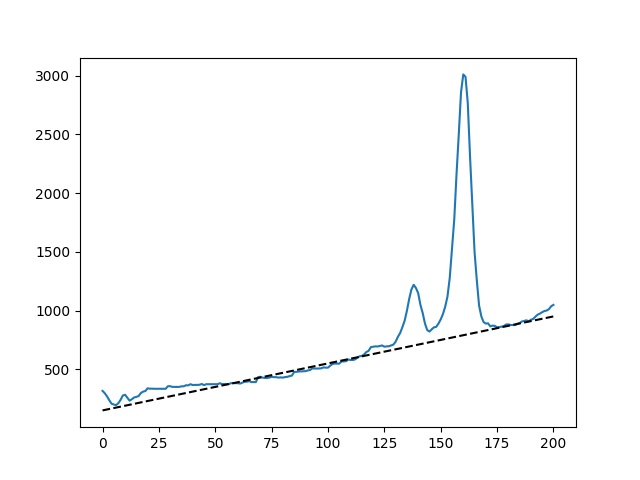

In [10]:
x = np.array([i for i in range(array_lane.shape[0])])

# BASELINE CORRECTION
f = plt.figure()
plt.plot(x, np.sum(array_lane, axis=1));
plt.plot(x, 4*x+150, linestyle='--', color='k');
cor_lane_sum = np.sum(array_lane, axis=1) - (4*x+150)

<IPython.core.display.Javascript object>


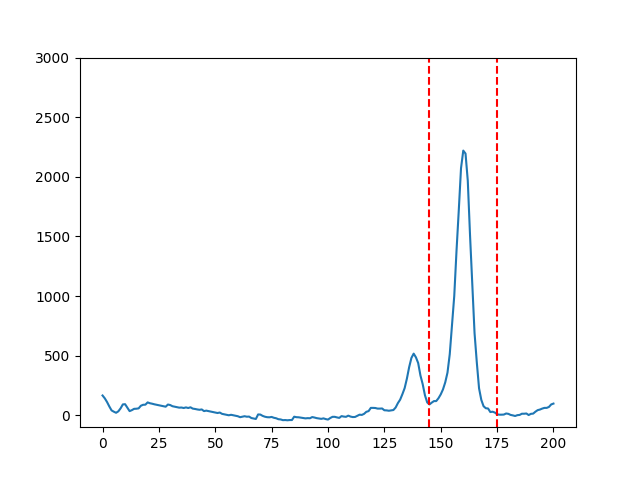

In [11]:
f = plt.figure()
plt.plot(x, cor_lane_sum);
plt.vlines([145, 175], -100, 5000, color='red', linestyle='--');
plt.ylim(-100, 3000);

In [12]:
final = cor_lane_sum
yield_est = np.sum(final[145:176]) / np.sum(final)

In [13]:
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from mpl_toolkits.axisartist.grid_finder import (DictFormatter, FixedLocator)
from matplotlib.patches import Polygon

def setup_axes2(fig, rect, max_y, pos):
    tr = Affine2D().scale(40, 1).rotate_deg(-90)
    
    grid_locator1 = FixedLocator([])
    grid_locator2 = FixedLocator([])
    
    tick_formatter1 = DictFormatter(dict([]))
    tick_formatter2 = DictFormatter(dict([]))
    
    grid_helper = floating_axes.GridHelperCurveLinear(tr, extremes=(0, 200, 0, max_y),
                                                      grid_locator1=grid_locator1, grid_locator2=grid_locator2,
                                                      tick_formatter1=tick_formatter1, tick_formatter2=None)
    
    ax2 = fig.add_subplot(rect, position=pos, axes_class=floating_axes.FloatingAxes,
                          grid_helper=grid_helper)
    aux_ax2 = ax2.get_aux_axes(tr)
    return ax2, aux_ax2

<IPython.core.display.Javascript object>


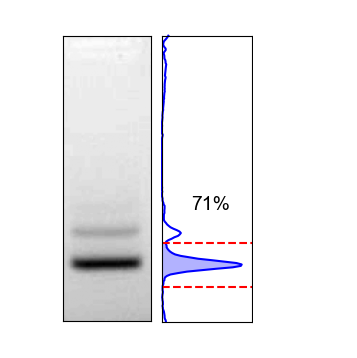

In [14]:
cmap = mpl.colormaps["binary"]

plt.rcParams["font.sans-serif"] = ['Arial']

cm = (1/2.54)

f = plt.figure(figsize=(16.5*0.55*cm, 16.5*0.55*cm))
ax1 = f.add_subplot(1, 2, 1, position=[0.1, 0.1, 0.4, 0.8])
ax1.set_xticks([]); ax1.set_yticks([]);
ax1.imshow(array_lane, cmap=cmap);

ax2, aux_ax2 = setup_axes2(f, 122, 2500, [0.38, 0.091, 0.4, 0.817])
aux_ax2.plot(x, cor_lane_sum, color='blue');
aux_ax2.vlines([145, 176], 0, 2500, color='red', linestyle='--');

ix = [i for i in range(145, 176)]
iy = cor_lane_sum[145:176]
verts = [(145, 0), *zip(ix, iy), (176, 0)]
poly = Polygon(verts, facecolor=(0, 0, 1.0, 0.3), edgecolor=(0, 0, 0, 0))
aux_ax2.add_patch(poly);

plt.figtext(0.59, 0.4, "{:.0f}%".format(100*yield_est), fontsize=14, ha='center', va='bottom');

f.savefig("gel_panel1.png", dpi=900, transparent=True)

<IPython.core.display.Javascript object>


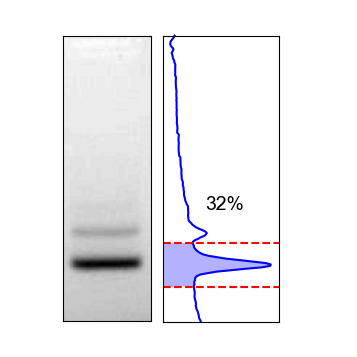

In [15]:
f = plt.figure(figsize=(16.5*0.55*cm, 16.5*0.55*cm))
ax1 = f.add_subplot(1, 2, 1, position=[0.1, 0.1, 0.4, 0.8])
ax1.set_xticks([]); ax1.set_yticks([]);
ax1.imshow(array_lane, cmap=cmap);

lane_sum = np.sum(array_lane, axis=1)

ax2, aux_ax2 = setup_axes2(f, 122, 3250, [0.42, 0.091, 0.4, 0.817])
aux_ax2.plot(x, lane_sum, color='blue');
aux_ax2.vlines([145, 176], 0, 3250, color='red', linestyle='--');

ix = [i for i in range(145, 176)]
iy = lane_sum[145:176]
verts = [(145, 0), *zip(ix, iy), (176, 0)]
poly = Polygon(verts, facecolor=(0, 0, 1.0, 0.3), edgecolor=(0, 0, 0, 0))
aux_ax2.add_patch(poly);

alt_yield = np.sum(lane_sum[145:176]) / np.sum(lane_sum)
plt.figtext(0.63, 0.4, "{:.0f}%".format(100*alt_yield), fontsize=14, ha='center', va='bottom');

f.savefig("gel_panel2.png", dpi=900, transparent=True)

<IPython.core.display.Javascript object>


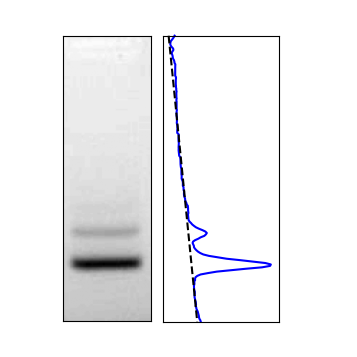

In [16]:
f = plt.figure(figsize=(16.5*0.55*cm, 16.5*0.55*cm))
ax1 = f.add_subplot(1, 2, 1, position=[0.1, 0.1, 0.4, 0.8])
ax1.set_xticks([]); ax1.set_yticks([]);
ax1.imshow(array_lane, cmap=cmap);

ax2, aux_ax2 = setup_axes2(f, 122, 3250, [0.42, 0.091, 0.4, 0.817])
aux_ax2.plot(x, lane_sum, color='blue');
aux_ax2.plot(x, 4*x+150, linestyle='--', color='k');

f.savefig("gel_panel3.png", dpi=900, transparent=True)